# Regresja Wielomianowa

Co gdy gdy trafimy na dane które nie są liniowe? W takim przypadku można użyć regresji wielomianowej. Technika ta polega na uczeniu zwykłego klasyfikatora liniowego na danych do których zostały dodane dodatkowe cechy w pewien specyficzny sposób

Najprostrzym sposobem jest dodanie **potęg** starej cechy jako nową ceche. Jest to przekształcenie nieliniowe którego nie jest wstanie odtworzyć prosty klasyfikator liniowy.

Dla przykładu jeżeli mamy zbiór danych których nie da się regresować liniowo:

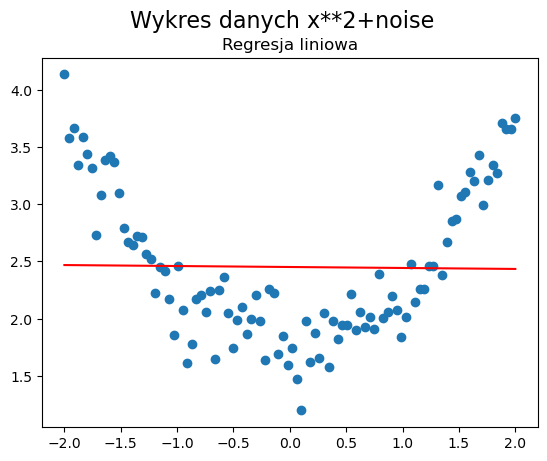

In [1]:
from IPython.display import display, Markdown
import sklearn.linear_model as sklm
import matplotlib.pyplot as plt
import numpy as np

def displmd(*args, **kwargs):
    display(Markdown('\n\n'.join(arg for arg in args), **kwargs))

count = 100
x = np.linspace(-2, 2, count)
y = 0.5 * x**2 + 2 + np.random.normal(-0.2, 0.2, count)

y_l = sklm.LinearRegression().fit(x.reshape(-1, 1), y).predict(x.reshape(-1, 1))

plt.suptitle("Wykres danych x**2+noise", fontsize=16)
plt.title("Regresja liniowa")
plt.scatter(x, y)
plt.plot(x, y_l, color='red')

Jak wydać nasz klasyfikator liniowy aby mógł się nauczyć takich danych?

Rozwiązaniem jest dodanie nowej cech na podstawie starej cechy. W tym przypadku wystarczy dodać cechę $x^2$.

(100, 2)


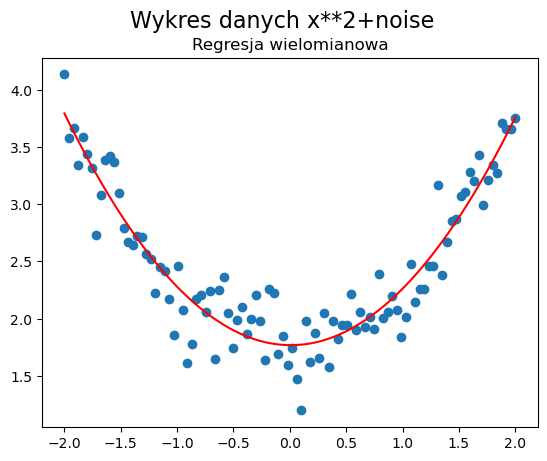

In [2]:
x_poly = np.array([x**2, x]).T
print(x_poly.shape)
y_p = sklm.LinearRegression().fit(x_poly.reshape(-1, 2), y).predict(x_poly.reshape(-1, 2))

plt.suptitle("Wykres danych x**2+noise", fontsize=16)
plt.title("Regresja wielomianowa")
plt.scatter(x, y)
plt.plot(x, y_p, color='red')

## Dlaczego tak się dzieje?

O ile przy użyciu naszych cech, dane są nieliniowo separowalne, dodanie cech $x^2$ sprawia że klasyfikator liniowy jest w stanie przejść przez takie dane (patrząc głównie na nową cechę).

Można to łatwo zobaczyć oglądając jak dane wyglądają w przestrzeni nowego wymiaru.


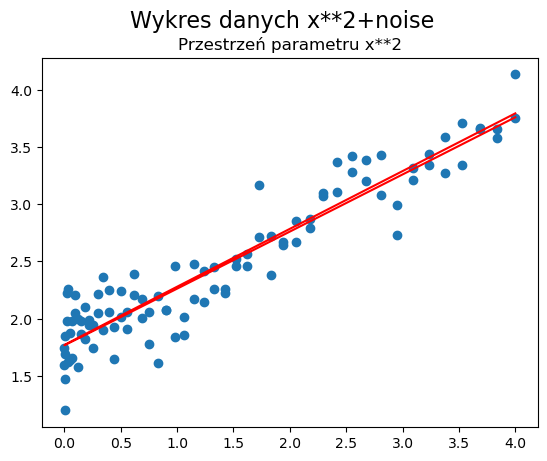

In [3]:
plt.suptitle("Wykres danych x**2+noise", fontsize=16)
plt.title("Przestrzeń parametru x**2")
plt.scatter(x_poly.T[0,:], y)
plt.plot(x_poly.T[0,:], y_p, color='red')

Jak widać na wykresie powyżej dane są liniowe, ale w stworzonym przez nas wymiarze. Dzięki temu klasyfikator liniowy jest w stanie je separować bardzo skutecznie. Biblioteka `sklearn` posiada wbudowaną klasę do generowania kombinacji takich parametrów `PolynomialFeatures`.

In [4]:
import sklearn.preprocessing as skp 
poly_features = skp.PolynomialFeatures(degree=2, include_bias=False)

x_poly = poly_features.fit_transform(x.reshape(-1, 1))
print(x_poly.shape)

(100, 2)


In [5]:
poly_features = skp.PolynomialFeatures(degree=10, include_bias=False)
poly_features.fit(x.reshape(-1, 1))
print(poly_features.get_feature_names_out())

['x0' 'x0^2' 'x0^3' 'x0^4' 'x0^5' 'x0^6' 'x0^7' 'x0^8' 'x0^9' 'x0^10']


Trzeba jednak bardzo uważać ponieważ ilość cech rośnie bardzo szybko. Jeżeli mamy $n$ cech na wejściu, funkcja `PolynomialFeatures` wygeneruje $\frac{(n + k)!}{k!n!}$ cech na wyjściu i mianownik rośnie dużo szybciej! Dzieje się tak dlatego że to narzędzie dla cech $(a, b)$ i `degree=3` nie tylko doda cechy $(a^2, a^3, b^2, b^3)$ ale także $(ab, a^2b, ab^2)$ (czyli wszystkie kombinacje cech których suma wykładników jest równa **3**). Klasę można zmusić do generowania maksymalnie `degree` cech poprzez ustawienie parametru `interaction_only=True` ale wtedy ten system nie ma sensu.

# Zadania

In [6]:
from sklearn import datasets
import sklearn.metrics as skm
import sklearn.pipeline as skpl
import sklearn.metrics as skm
import sklearn.feature_selection as skfs
import sklearn.model_selection as skms
import pandas as pd


data = datasets.load_diabetes(as_frame=True)

x = pd.DataFrame(data['data'])   #type: ignore
y = pd.DataFrame(data['target']) #type: ignore

displmd(f"Rozmiar danych: `{x.shape}`", f"Rozmiar etykiet: `{y.shape}`")
x.head()

Rozmiar danych: `(442, 10)`

Rozmiar etykiet: `(442, 1)`

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
x.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01


Wczytaliśmy dane i są już znormalizowane! W tym zadaniu będziemy uczyć klasyfikator wielomianowy w nadziei że będzie lepszy od zwykłego. W tym celu wykorzystamy klasę `PolynomialFeatures` z biblioteki `sklearn.preprocessing` a następnie będziemy eksperymentować z ilością cech, stopniem wielomianu i jak one wpływają na wynik.

Stwórzmy więc pipeline i kilka funkcji które ułatwią nam uczenie.

In [8]:
import sklearn.base as skb

def generate_pipeline(degree: int, inlude_bias: bool, selector):

    if isinstance(selector, int):
        selector = skfs.RFE(sklm.LinearRegression(), n_features_to_select=selector)
    else: 
        selector = 'passthrough'

    return skpl.Pipeline([
        ('poly', skp.PolynomialFeatures(degree=degree, include_bias=inlude_bias)),
        ('select', selector),
        ('reg', sklm.LinearRegression())
    ])

# split data
x_train, x_test, y_train, y_test = skms.train_test_split(x, y, test_size=0.2, random_state=42)

## Sprqwdźmy czy pipeline działa
Wytrenujmy model dla stopnia 1 i sprawdźmy czy wyniki są poprawne.

In [9]:
test_lm = generate_pipeline(1, True, None)
test_lm.fit(x_train, y_train)
y_pred = test_lm.predict(x_test)

displmd(
f"""
## Regresja liniowa, zbiór testowy
* R2: `{skm.r2_score(y_test, y_pred):.3f}`
* MSE: `{skm.mean_squared_error(y_test, y_pred):.3f}`

## Regresja liniowa, zbiór treningowy
* R2: `{skm.r2_score(y_train, test_lm.predict(x_train)):.3f}`
* MSE: `{skm.mean_squared_error(y_train, test_lm.predict(x_train)):.3f}`

## Wagi
{pd.DataFrame(test_lm.named_steps['reg'].coef_[:, 1:], columns=x.columns, index=['Wagi']).to_markdown()}
"""
)



## Regresja liniowa, zbiór testowy
* R2: `0.453`
* MSE: `2900.173`

## Regresja liniowa, zbiór treningowy
* R2: `0.528`
* MSE: `2868.547`

## Wagi
|      |     age |      sex |     bmi |      bp |       s1 |      s2 |      s3 |     s4 |      s5 |      s6 |
|:-----|--------:|---------:|--------:|--------:|---------:|--------:|--------:|-------:|--------:|--------:|
| Wagi | 37.9003 | -241.966 | 542.426 | 347.708 | -931.461 | 518.044 | 163.404 | 275.31 | 736.189 | 48.6711 |


Gdy **degree** jest równe 1 to nasz model jest zwykłym klasyfikatorem liniowym bez żadnych nowych cech. MSE na zbiorze testowym jest całkiem wysokie jak również wskaźnik $R^2$ jest bardzo niski.

Sprawdźmy jak wygląda wynik dla stopnia 3.

Widzimy że MSE jest niższe na zbiorze treningowym. Jednak na zbiorze testowym jest ono wyższe niż dla stopnia 1! Wynika to z przetrenowania modelu. Można powiedzieć że model ma tak wiele parametrów, że może *skojarzyć* jeden parametr z próbką i dochodzi do absurdalnego przetrenowania.

Jako ciekawostkę wypiszemy również wszystkie parametry jake zostały wygenerowane przez `PolynomialFeatures` dla stopnia 3 i 10 cech wejściowych. 
Jest ich baardzo dużo. Znajdują się tam również wartości `coef_` które są wykorzystywane przez klasyfikator liniowy, wszystkie są bardzo duże. Widać że model jest bardzo skomplikowany i posiada bardzo dużą moc opisową. 

In [10]:
lm = generate_pipeline(3, True, None)
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)


named_params = [f'{param}' for param in lm.named_steps['poly'].get_feature_names_out()]
weightsdf = pd.DataFrame(lm.named_steps['reg'].coef_, columns=named_params, index=['Wagi'])
weightsdf = weightsdf.T
lenght = len(weightsdf)

bins = 26
# split into bins
weightsin5columns = [pd.DataFrame(weightsdf.iloc[i:i+bins, :], columns = ["Wagi"])  for i in range(0, lenght, bins)]
# concat bins into one long table with "Weight" in header
df = pd.DataFrame()
for i in range(len(weightsin5columns)):
    df[f"{i}_Nazwa"] = weightsin5columns[i].index
    df[f"{i}_Waga"] = np.array(weightsin5columns[i]["Wagi"])
df.columns = df.columns.str.split('_', expand=True)

displmd(
f"""
## Regresja liniowa, zbiór testowy
* R2: `{skm.r2_score(y_test, y_pred):.3f}`
* MSE: `{skm.mean_squared_error(y_test, y_pred):.3f}`

## Regresja liniowa, zbiór treningowy
* R2: `{skm.r2_score(y_train, lm.predict(x_train)):.3f}`
* MSE: `{skm.mean_squared_error(y_train, lm.predict(x_train)):.3f}`

## Wagi
""")
df



## Regresja liniowa, zbiór testowy
* R2: `-18.918`
* MSE: `105528.000`

## Regresja liniowa, zbiór treningowy
* R2: `0.697`
* MSE: `1841.091`

## Wagi


0                     1                          2                \
      Nazwa          Waga   Nazwa          Waga        Nazwa          Waga   
0         1  4.863270e+16  sex s3  1.367656e+07        s2 s3  7.784214e+07   
1       age -9.511040e+04  sex s4 -1.477421e+04        s2 s4  4.958171e+06   
2       sex -1.586868e+05  sex s5  1.204951e+07        s2 s5  2.127732e+07   
3       bmi -1.285805e+03  sex s6  6.937581e+03        s2 s6  2.902038e+07   
4        bp -3.254666e+05   bmi^2 -1.241237e+03         s3^2  1.562657e+07   
5        s1 -1.775397e+06  bmi bp -7.001219e+03        s3 s4  2.047348e+06   
6        s2  1.634952e+06  bmi s1 -4.151761e+05        s3 s5  7.414362e+06   
7        s3  7.169914e+05  bmi s2  3.550492e+05        s3 s6  1.233988e+07   
8        s4 -2.319178e+04  bmi s3  1.770825e+05         s4^2 -3.265586e+04   
9        s5  8.263304e+05  bmi s4  4.074624e+04        s4 s5  1.811935e+06   
10       s6 -1.430453e+05  bmi s5  1.323090e+05        s4 s6 -1.404388e+04   
11    age^2 -7.652422e+03  bmi s6 -1.736121e+04         s5^2 -1.314883e+06   
12  age sex  7.680200e+03    bp^2 -6.088319e+03        s5 s6  1.086877e+07   
13  age bmi  9.434134e+03   bp s1 -7.516927e+07         s6^2  1.387554e+03   
14   age bp -6.768248e+03   bp s2  6.606391e+07        age^3 -7.399046e+04   
15   age s1 -2.206085e+07   bp s3  2.811011e+07    age^2 sex  2.550907e+04   
16   age s2  1.939116e+07   bp s4 -1.047414e+04    age^2 bmi  9.689022e+03   
17   age s3  8.247273e+06   bp s5  2.472996e+07     age^2 bp  1.422864e+05   
18   age s4 -1.063569e+04   bp s6  3.806209e+03     age^2 s1 -1.219601e+06   
19   age s5  7.256707e+06    s1^2  1.448393e+08     age^2 s2  1.550388e+06   
20   age s6  1.121231e+04   s1 s2 -2.371798e+08     age^2 s3  8.507882e+04   
21    sex^2 -9.581438e+02   s1 s3 -9.594005e+07     age^2 s4 -6.597743e+05   
22  sex bmi  1.079274e+04   s1 s4 -5.573436e+06     age^2 s5 -4.523093e+04   
23   sex bp  2.935701e+02   s1 s5 -3.073093e+07     age^2 s6  2.422345e+05   
24   sex s1 -3.658688e+07   s1 s6 -3.301600e+07    age sex^2 -1.687920e+02   
25   sex s2  3.215654e+07    s2^2  9.655332e+07  age sex bmi -4.036590e+04   

             3                        4                ...          6  \
         Nazwa          Waga      Nazwa          Waga  ...      Nazwa   
0   age sex bp -1.433123e+05  age s1 s5  9.340196e+07  ...   sex s3^2   
1   age sex s1  6.415389e+05  age s1 s6  3.606496e+06  ...  sex s3 s4   
2   age sex s2 -3.538733e+05   age s2^2 -1.813428e+07  ...  sex s3 s5   
3   age sex s3 -7.892891e+05  age s2 s3 -1.087585e+07  ...  sex s3 s6   
4   age sex s4 -3.890974e+05  age s2 s4  7.529003e+06  ...   sex s4^2   
5   age sex s5 -1.788754e+05  age s2 s5 -8.330972e+07  ...  sex s4 s5   
6   age sex s6  6.903605e+04  age s2 s6 -3.318073e+06  ...  sex s4 s6   
7    age bmi^2 -2.286356e+04   age s3^2 -1.488754e+06  ...   sex s5^2   
8   age bmi bp  5.837341e+02  age s3 s4  3.626725e+06  ...  sex s5 s6   
9   age bmi s1  1.146334e+06  age s3 s5 -3.429166e+07  ...   sex s6^2   
10  age bmi s2 -1.066945e+06  age s3 s6 -1.565050e+06  ...      bmi^3   
11  age bmi s3 -1.249744e+05   age s4^2  1.584856e+05  ...   bmi^2 bp   
12  age bmi s4  1.786314e+05  age s4 s5  2.479120e+06  ...   bmi^2 s1   
13  age bmi s5 -2.453839e+05  age s4 s6 -2.707389e+05  ...   bmi^2 s2   
14  age bmi s6  8.343425e+04   age s5^2  9.864816e+06  ...   bmi^2 s3   
15    age bp^2  1.556011e+04  age s5 s6 -8.474418e+05  ...   bmi^2 s4   
16   age bp s1 -3.508204e+06   age s6^2 -1.213642e+05  ...   bmi^2 s5   
17   age bp s2  2.993199e+06      sex^3 -3.648080e+02  ...   bmi^2 s6   
18   age bp s3  1.654634e+06  sex^2 bmi  6.225824e+01  ...   bmi bp^2   
19   age bp s4  2.935519e+05   sex^2 bp -7.345993e+02  ...  bmi bp s1   
20   age bp s5  1.091472e+06   sex^2 s1 -2.249460e+05  ...  bmi bp s2   
21   age bp s6 -1.875969e+05   sex^2 s2  1.978757e+05  ...  bmi bp s3   
22    age s1^2 -1.824661e+07   sex^2 s3  8.420782e+04  ...  bmi bp s4   


Aby zapobiec przetrenowaniu można użyć `stage`'a `RFE` (albo `SelectKBest`) który wybiera najlepsze cechy.  

In [11]:
lm = generate_pipeline(2, True, 15)
lm.fit(x_train, y_train)

displmd(
f"""
## Regresja liniowa, zbiór testowy
* R2: `{skm.r2_score(y_test, lm.predict(x_test)):.3f}`
* MSE: `{skm.mean_squared_error(y_test, lm.predict(x_test)):.3f}`
## Regresja liniowa, zbiór treningowy
* R2: `{skm.r2_score(y_train, lm.predict(x_train)):.3f}`
* MSE: `{skm.mean_squared_error(y_train, lm.predict(x_train)):.3f}`
## Wagi
{pd.DataFrame(lm.named_steps['reg'].coef_, columns=lm.named_steps['select'].get_feature_names_out(), index=['Wagi']).to_markdown()}
"""
)


## Regresja liniowa, zbiór testowy
* R2: `0.389`
* MSE: `3235.229`
## Regresja liniowa, zbiór treningowy
* R2: `0.400`
* MSE: `3643.114`
## Wagi
|      |       x5 |    x6 |      x7 |      x9 |     x18 |      x32 |     x33 |     x36 |   x46 |    x49 |    x51 |      x52 |     x54 |      x58 |     x63 |
|:-----|---------:|------:|--------:|--------:|--------:|---------:|--------:|--------:|------:|-------:|-------:|---------:|--------:|---------:|--------:|
| Wagi | -45467.3 | 39931 | 16628.8 | 15897.6 | 1546.73 | -12629.5 | 8800.53 | 7475.81 | 22774 | 132912 | -20428 | -9327.48 | -127365 | -47707.5 | 36308.5 |


## Rozmiar zbioru vs stopień wielomianu

Sprawdźmy jak zmienia się wynik w zależności od stopnia wielomianu i rozmiaru zbioru uczącego i jaki to ma wpływ na przetrenowanie.

Eksperymet polega na wtrenowaniu 3 modeli na różnych rozmiarach zbiorów - od 1 do końca całego zbioru uczącego (około `350` dla tego zbioru)
Wybrane stopnie wielomianu to 1, 2 i 3 ponieważ mają sensowną ilość parametrów w porównaniu do rozmiaru zbioru uczącego.
* **degree 1**
* **degree 2**
* **degree 3**

Funkcja wygeneruje dwa wykresy, jeden w skali logarytmicznej a drugi liniowej ale z innymi limitami na y'eku

In [12]:
def plot_learning_curves(model, x, y, label):
    x_train, x_val, y_train, y_val = skms.train_test_split(x, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(x_train)):
        model.fit(x_train[:m], y_train[:m])
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        train_errors.append(skm.mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(skm.mean_squared_error(y_val, y_val_predict))

    _, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))    
    
    ax1.plot(train_errors, "r-+", linewidth=2, label="zbiór treningowy")
    ax1.plot(val_errors, "b-", linewidth=3, label="zbiór walidacyjny")
    ax1.set_yscale('log')
    ax1.legend(loc="best", fontsize=14)   
    ax1.set_xlabel("Rozmiar zbioru treningowego", fontsize=14) 
    ax1.set_ylabel("RMSE", fontsize=14)
    ax1.set_title(label, fontsize=18)

    ax2.plot(train_errors, "r-+", linewidth=2, label="zbiór treningowy")
    ax2.plot(val_errors, "b-", linewidth=3, label="zbiór walidacyjny")
    ax2.legend(loc="best", fontsize=14)
    ax2.set_xlabel("Rozmiar zbioru treningowego", fontsize=14)
    ax2.set_ylabel("RMSE", fontsize=14)
    ax2.set_title(label + ' focus', fontsize=18)
    ax2.set_ylim(0, 10**5)

    plt.show()

# Polyfit 3
To są dość ciekawe wykresy - zaobserywujmy że dla degree = 3, ilość cech to ok. 270. Jak widać, dla zbioru **uczącego** Model jest wstanie go odtworzyć niemal **perfekcyjnie** (MSE ~ 0). Jednak dla zbioru **testowego** MSE jest estremalnie wysokie i jeszcze rośnie. Dopiero kiedy skończyła się zdolność opisywania zbioru uczącego, model zaczyna zyskiwać jakiś błąd co jest pokazane na wykresie jako ostry wzrost MSE.

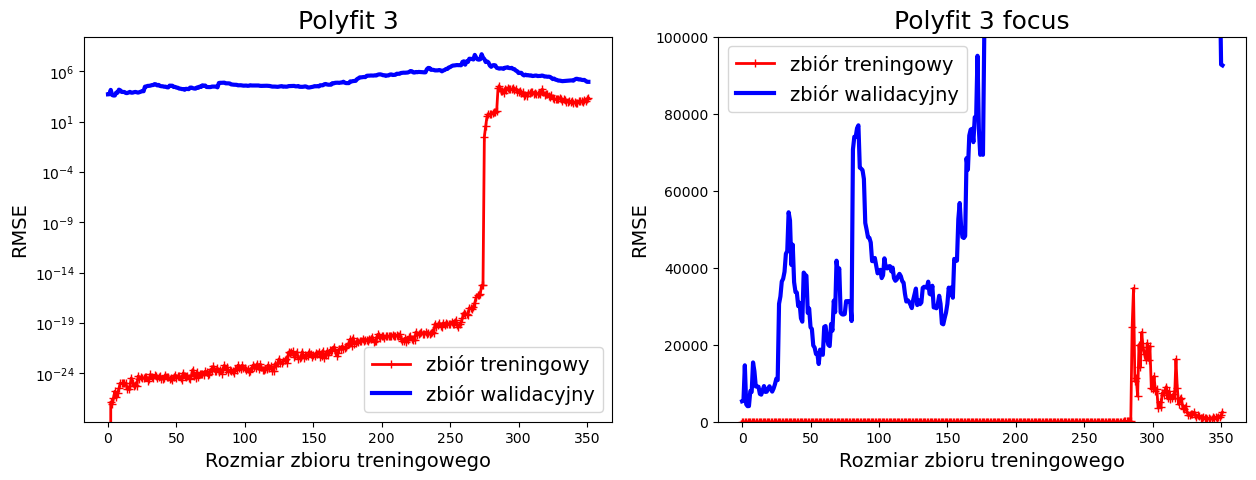

In [13]:
lm = generate_pipeline(3, True, None)
plot_learning_curves(lm, x, y, "Polyfit 3")

# Polyfit 2
To jest podobny przypadek ale tym razem model ma mniej parametrów przez co nie jest wstanie tak długo utrzymać się w stanie przetrenowania. Model po około 200 próbkach ma dość podobne wyniki na zbiorze uczącym i testowym co jest dobrym znakiem. Ozczancza to że zmuszamy model do szukania bardziej ogólnych zależności w danych. Pamiętajmy że nadal korzystamy z wszystkich cech, bez eliminacji.

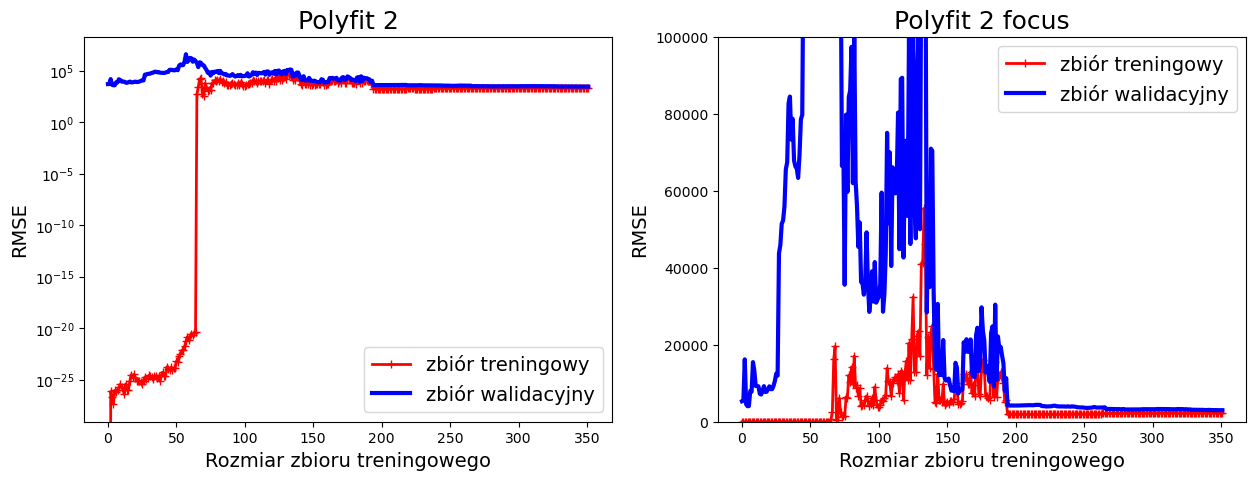

In [14]:
lm = generate_pipeline(2, True, None)
plot_learning_curves(lm, x, y, "Polyfit 2")

## Polyfit 1
W tym przypadku nie generujemy nowych cech, Model uczy się bardzo szybko i osiąga niższe MSE niż w przypadku używania `PolynomialFeatures`. Może to narzędzie jest przereklamowane? Nie jest. Trzeba usunąć niepotrzebne cechy, wtedy model może dostać akurat tą nieliniową kombinacje kilku parametrów której potrzebuje do opisania danych.

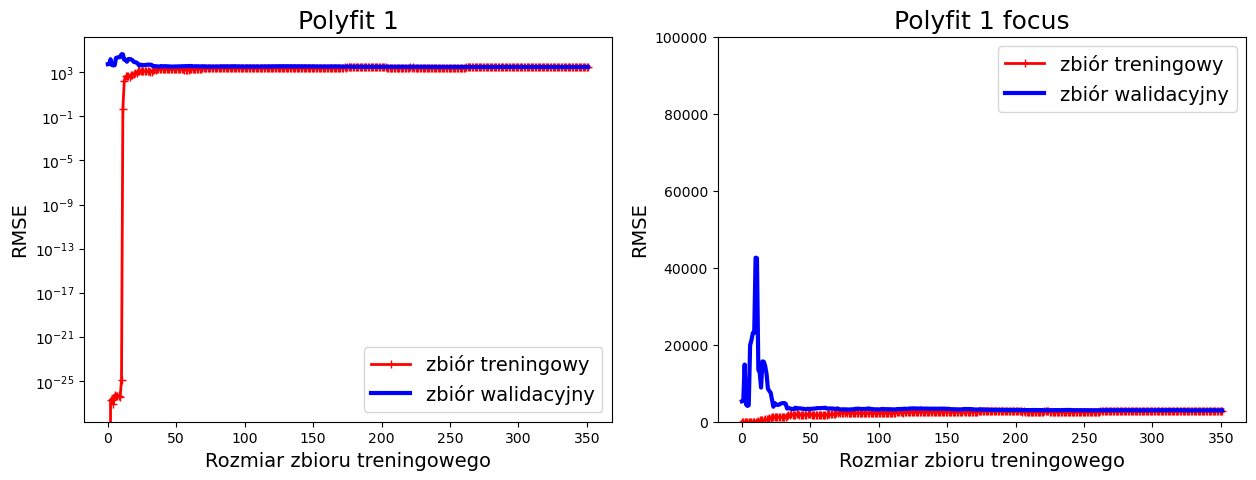

In [15]:
lm = generate_pipeline(1, True, None)
plot_learning_curves(lm, x, y, "Polyfit 1")

## Wariacja ilości cech

Kolejnym eksperymentem jest uczenie na całym zbiorze treningowym i utrzymanie tego samego **degree** (3) ale z usuwaniem cech przy użyciu algorytmu `RFE` (Recursive Feature Elimination). 

In [16]:
from tqdm import tqdm

def plot_learning_curves_vs_feature_count(degree, features, x, y, njobs=-1):
    x_train, x_val, y_train, y_val = skms.train_test_split(x, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in tqdm(features):
        # train poly
        lm = skp.PolynomialFeatures(degree=degree, include_bias=False)
        x_poly = lm.fit_transform(x_train)
        x_val_poly = lm.transform(x_val)

        # train feature selection
        lm2 = skfs.RFE(estimator=sklm.LinearRegression(n_jobs=njobs), n_features_to_select=m)
        lm2.fit(x_poly, y_train)

        # train model
        lm3 = sklm.LinearRegression(n_jobs=njobs)
        lm3.fit(x_poly[:, lm2.support_], y_train)

        y_train_predict = lm2.predict(x_poly)
        y_val_predict = lm2.predict(x_val_poly)
        
        train_errors.append(skm.mean_squared_error(y_train, y_train_predict))
        val_errors.append(skm.mean_squared_error(y_val, y_val_predict))

    plt.figure(figsize=(16, 8))
    plt.plot(features, train_errors, "r-+", linewidth=2, label="zbiór treningowy")
    plt.plot(features, val_errors, "b-", linewidth=3, label="zbiór walidacyjny")
    plt.yscale('log')
    plt.legend(loc="best", fontsize=14)   
    plt.xlabel("Liczba cech", fontsize=14) 
    plt.ylabel("RMSE", fontsize=14)
    plt.title("Różne liczby cech", fontsize=18)
    plt.show()

Wykorzystaliśmy model o stopniu 3 ponieważ jest on w stanie opisać cały zbiór uczący co pozwoli nam ładnie pokazać jak zmienia się MSE w zależności od ilości cech.

Można tutaj zauważyć kilka własności:
* **MSE na zbiorze uczącym** spada wraz z ilością cech.
* **MSE na zbiorze testowym** spada przez krótki okres a potem zaczyna znacząco wzrastać przez przetrenowanie modelu.

Interesuje nas model w którym MSE na zbiorze testowym jest jak najmniejsze. W tym przypadku jest to coś w okolicy 25 cech. Oznacza to że z pośród 270 cech, model wybrał 25 najlepszych i pozostałe 245 cech przeszkadzają, przypomnę że rozpoczeliśmy z 10 cechami, czyli PolynomialFeatures i RFE znalazł nam 15 użytecznych cech!

Liczba cech dla polyfit 2: 286


100%|██████████| 276/276 [03:37<00:00,  1.27it/s]


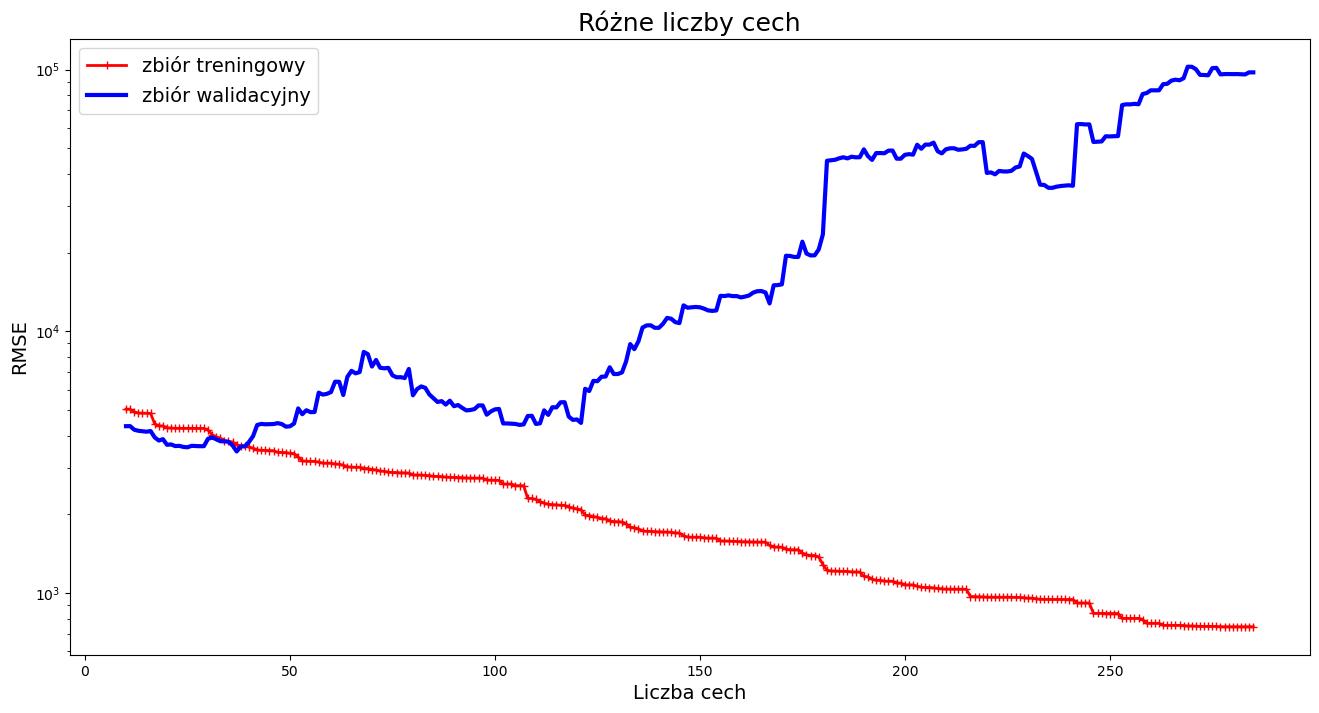

In [17]:
features_count_deg2 = len(generate_pipeline(3, True, None).fit(x_train, y_train).named_steps['poly'].get_feature_names_out())
print(f"Liczba cech dla polyfit 2: {features_count_deg2}")
plot_learning_curves_vs_feature_count(3, range(10, features_count_deg2), x, y) # 10 minutes

Dobrą metodą na regularyzację jest użycie `Ridge` lub `Lasso` które są w stanie okiełznać model i zredukować jego złożoność. Dzieje się tak ponieważ dodają do funkcji kosztu dodatkowy parametr który jest zależny od wielkości parametrów modelu. W ten sposób model preferuje zależności z niskimi wagami.

$$
Cost_{Lasso}(x, y) = Cost_\theta(x, y) + \alpha \sum_{i=1}^{n} ||\theta_i||
$$

Jest to dobra metoda na znalezienie lepszego modelu!

Aby oszczędzić sobie trochę wysiłku i czasu, zastosowaliśmy `GridSearchCV` który sprawdził wszystkie możliwe kombinacje wybranych parametrów i modeli.
Sprawdzam:
* Lasso
  * Wariancja parametru $\alpha$ 
* LinearRegression
* Wariancja `degree`
* Wariancje ilości cech (0%, 10%, ... 100%)

Błędy ignoruje.

In [20]:
# create gridsearch params for generated pipeline
model = skpl.Pipeline([
    ('poly', skp.PolynomialFeatures()),
    ('drop', skfs.RFE(estimator=sklm.Lasso())),
    ('regr', sklm.Lasso()),
])

params = [{
    'poly__degree': [1, 2, 3],
    'regr': [sklm.Lasso()], 
    'regr__alpha': np.logspace(-4, 1, 5),
    'drop__n_features_to_select': np.linspace(0, 1, 10),
    'drop__estimator': [sklm.Lasso(alpha=a) for a in np.logspace(-4, 1, 5)],
},{
    'poly__degree': [1, 2, 3],
    'regr': [sklm.LinearRegression()],
    'drop__n_features_to_select': np.linspace(0, 1, 10),
    'drop__estimator': [sklm.LinearRegression()],
}]

# create gridsearch
grid = skms.GridSearchCV(model, params, cv=4, n_jobs=-1, verbose=1, scoring='r2')

# gridsearch going mad... I gived up and switched to pc
grid.fit(x, y)

Fitting 4 folds for each of 780 candidates, totalling 3120 fits


c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
312 fits failed out of a total of 3120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
150 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "c:\Users\Maciej\anaconda3\lib\site-packages\sklearn\pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "c:\Users\Macie

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('drop', RFE(estimator=Lasso())),
                                       ('regr', Lasso())]),
             n_jobs=-1,
             param_grid=[{'drop__estimator': [Lasso(alpha=0.0001),
                                              Lasso(alpha=0.0017782794100389228),
                                              Lasso(alpha=0.03162277660168379),
                                              Lasso(alpha=0.5623413251903491),
                                              Lasso(alpha=10.0)],
                          'drop__n_features_to_select': array([0.        , 0.111...
                          'regr': [Lasso(alpha=0.0001)],
                          'regr__alpha': array([1.00000000e-04, 1.77827941e-03, 3.16227766e-02, 5.62341325e-01,
       1.00000000e+01])},
                         {'drop__estimator': [LinearRegression()],
                          'drop__

Samo przeszukiwanie było straszne ale wyniki są zadawalające. Model znalazł wiele kombinacji parametrów które już teraz dają lepsze wyniki od naiwnego modelu. Parametry najlepszego modelu są wyświetlone niżej. Co ciekawe przeszukowanie znalazło kombinacje parametrów która ma wysoki współczynnik $\alpha$ w `RFE` i niski w `Lasso`. Przy okazji wybrał wysoki stopień wielomianu i małą ilość cech. 

In [21]:
displmd(
    "## Grid search results",
    "Best score: `{:.4f}`".format(grid.best_score_),
    f"""Best params: 
```py 
{grid.best_params_}
```""")


## Grid search results

Best score: `0.5022`

Best params: 
```py 
{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.1111111111111111, 'poly__degree': 3, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}
```

Można sprawdzić dokładniejsze wyniki które pokazują że prawie zawsze najlepszym estymatorem jest `Lasso`, chociaż `LinearRegression` było znacznie mniej do przeszukania.

In [22]:
cvres = grid.cv_results_

cvresults = pd.DataFrame(cvres)

displmd(
    "## All results",
    cvresults[["mean_test_score", "rank_test_score", "params"]]
    .where(lambda x: x["mean_test_score"] > 0) #type: ignore
    .query("mean_test_score == mean_test_score")
    .sort_values(by="rank_test_score")
    .apply(lambda x: ({"test score": f"${x[0]:.5f}$", "params": f"`{x[2]}`"}), axis=1, result_type='expand') #type: ignore
    .head(20)
    .to_markdown() 
)



## All results

|     | test score   | params                                                                                                                                                                                            |
|----:|:-------------|:--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| 325 | $0.50222$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.1111111111111111, 'poly__degree': 3, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                  |
| 341 | $0.50043$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.2222222222222222, 'poly__degree': 3, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |
| 326 | $0.50028$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.1111111111111111, 'poly__degree': 3, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |
| 351 | $0.49994$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.3333333333333333, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |
| 350 | $0.49694$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.3333333333333333, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                  |
| 366 | $0.49219$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.4444444444444444, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |
| 381 | $0.49096$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.5555555555555556, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |
|  76 | $0.49002$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.5555555555555556, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`                |
| 226 | $0.48986$    | `{'drop__estimator': Lasso(alpha=0.0017782794100389228), 'drop__n_features_to_select': 0.5555555555555556, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}` |
|  91 | $0.48985$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.6666666666666666, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`                |
| 225 | $0.48981$    | `{'drop__estimator': Lasso(alpha=0.0017782794100389228), 'drop__n_features_to_select': 0.5555555555555556, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                |
|  75 | $0.48968$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.5555555555555556, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                               |
| 765 | $0.48966$    | `{'drop__estimator': LinearRegression(), 'drop__n_features_to_select': 0.5555555555555556, 'poly__degree': 1, 'regr': LinearRegression()}`                                                        |
| 240 | $0.48958$    | `{'drop__estimator': Lasso(alpha=0.0017782794100389228), 'drop__n_features_to_select': 0.6666666666666666, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                |
|  90 | $0.48945$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.6666666666666666, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                               |
| 241 | $0.48943$    | `{'drop__estimator': Lasso(alpha=0.0017782794100389228), 'drop__n_features_to_select': 0.6666666666666666, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}` |
| 768 | $0.48943$    | `{'drop__estimator': LinearRegression(), 'drop__n_features_to_select': 0.6666666666666666, 'poly__degree': 1, 'regr': LinearRegression()}`                                                        |
| 320 | $0.48934$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.1111111111111111, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                  |
|  92 | $0.48933$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.6666666666666666, 'poly__degree': 1, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.03162277660168379}`                  |
| 321 | $0.48884$    | `{'drop__estimator': Lasso(alpha=0.03162277660168379), 'drop__n_features_to_select': 0.1111111111111111, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |

Na finał należy przetrenować estymator na całym zbiorze uczącym i sprawdzić jego wyniki na zbiorze testowym. 

In [23]:
final = grid.best_estimator_
final.fit(x_train, y_train) # type: ignore

displmd(
    "## Final model (test set)",
    f"MSE: `{skm.mean_squared_error(y_test, final.predict(x_test)):.4f}`", # type: ignore
    f"R2: `{skm.r2_score(y_test, final.predict(x_test)):.4f}`", # type: ignore
    "## First attempt (test set)",
    f"MSE: `{skm.mean_squared_error(y_test, test_lm.predict(x_test)):.4f}`", # type: ignore
    f"R2: `{skm.r2_score(y_test, test_lm.predict(x_test)):.4f}`", # type: ignore
    f"**Sukces**" if skm.r2_score(y_test, test_lm.predict(x_test)) < skm.r2_score(y_test, final.predict(x_test)) else "*Porażka*", # type: ignore
)

## Final model (test set)

MSE: `2531.9790`

R2: `0.5221`

## First attempt (test set)

MSE: `2900.1733`

R2: `0.4526`

**Sukces**

10 modeli które poradziły sobie najgorzej z zadaniem.

In [24]:
# display 10 worst models
displmd(
    "## 10 worst models",
    cvresults[["mean_test_score", "rank_test_score", "params"]]
    .where(lambda x: x["mean_test_score"] > 0) #type: ignore
    .query("mean_test_score == mean_test_score")
    .sort_values(by="rank_test_score")
    .apply(lambda x: ({"test score": f"${x[0]:.5f}$", "params": f"`{x[2]}`"}), axis=1, result_type='expand') #type: ignore
    .tail(10)
    .to_markdown()
)


## 10 worst models

|     | test score   | params                                                                                                                                                                             |
|----:|:-------------|:-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
|  66 | $0.03498$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.4444444444444444, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}` |
|  51 | $0.03466$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.3333333333333333, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}` |
| 666 | $0.02562$    | `{'drop__estimator': Lasso(alpha=10.0), 'drop__n_features_to_select': 0.4444444444444444, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |
|  21 | $0.01923$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.1111111111111111, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}` |
|  36 | $0.01738$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.2222222222222222, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}` |
| 712 | $0.00789$    | `{'drop__estimator': Lasso(alpha=10.0), 'drop__n_features_to_select': 0.7777777777777777, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.03162277660168379}`     |
| 682 | $0.00779$    | `{'drop__estimator': Lasso(alpha=10.0), 'drop__n_features_to_select': 0.5555555555555556, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.03162277660168379}`     |
| 697 | $0.00779$    | `{'drop__estimator': Lasso(alpha=10.0), 'drop__n_features_to_select': 0.6666666666666666, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.03162277660168379}`     |
|  20 | $0.00513$    | `{'drop__estimator': Lasso(alpha=0.0001), 'drop__n_features_to_select': 0.1111111111111111, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0001}`                |
| 651 | $0.00482$    | `{'drop__estimator': Lasso(alpha=10.0), 'drop__n_features_to_select': 0.3333333333333333, 'poly__degree': 2, 'regr': Lasso(alpha=0.0001), 'regr__alpha': 0.0017782794100389228}`   |

In [25]:
cvresults.describe()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
count,780.000000,780.000000,780.000000,780.000000,702.000000,702.000000,702.000000,7.020000e+02,702.000000,7.020000e+02,780.000000
mean,0.891378,0.056208,0.003180,0.001484,0.066713,0.160446,-0.051580,-6.002558e+03,-1500.595533,2.599295e+03,372.525641
std,2.128861,0.141716,0.001921,0.002134,1.620316,1.565884,4.870291,1.029895e+05,25749.221592,4.459469e+04,211.331935
min,0.005250,0.000072,0.000000,0.000000,-28.740072,-24.652756,-104.819181,-2.495737e+06,-623973.708362,1.683222e-02,1.000000
25%,0.017333,0.002292,0.002500,0.000426,-0.116503,-0.024043,-0.009694,-2.240121e-03,-0.038120,4.592752e-02,195.750000
50%,0.065644,0.007570,0.003133,0.000682,0.321787,0.418482,0.438491,4.642009e-01,0.416688,5.713898e-02,390.500000
75%,0.546779,0.030922,0.003914,0.001501,0.360028,0.491761,0.486003,5.336593e-01,0.467143,7.232511e-02,521.000000
max,11.451966,1.190414,0.018843,0.012575,0.404770,0.552541,0.535297,5.850953e-01,0.502218,1.080663e+06,780.000000
